In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = "/root/data/"

df_fake = pd.read_csv(data_path + "Fake.csv")
df_true = pd.read_csv(data_path + "True.csv")
df_fake['label'] = 1  # Fake news label
df_true['label'] = 0   # Real news label
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [4]:
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [5]:
df = pd.concat([df_true,df_fake])
df = df.drop(['title','subject','date'],axis=1)
df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [6]:
import pandas as pd
import numpy as np

data2_path = "/root/data/"
myrawdata = pd.read_csv(data2_path+"news.csv")
myrawdata = myrawdata.iloc[: , 2:]
myrawdata = myrawdata.infer_objects(copy=False)
myrawdata = myrawdata.replace( ['FAKE'],1 )
myrawdata = myrawdata.replace( ['REAL'],0 )

myrawdata.head()

/tmp/ipykernel_88098/2681254033.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  myrawdata = myrawdata.replace( ['REAL'],0 )


,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,U.S. Secretary of State John F. Kerry said Mon...,0
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,It's primary day in New York and front-runners...,0


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Preprocess text
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    if not isinstance(text, str):
        text = ''
    text = text.lower()                              # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)          # Remove special characters and numbers
    tokens = word_tokenize(text)                     # Tokenization
    stop_words = set(stopwords.words('english'))     # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # lemmatizer = WordNetLemmatizer()                 # Lemmatization  ex: running => run (not nesscessary, but i want to test)
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

glove_path = "/root/data/glove/"

df['clean_text'] = df['text'].apply(preprocess_text)
df.head()

"""
這裡看起來是處裡文字的函式，將文字tokenize
"""

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


# Tokenization and padding
MAX_NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 1000
EMBEDDING_DIM = 100

# tokenizer turns texts to tokens
# e.g ['Some ThING to eat !', 'some thing to drink .']
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(df['clean_text'])
# after fit_on_texts, it creates a word_index:[('some', 2), ('thing', 2), ('to', 2), ('eat', 1), ('drink', 1)]), showing the freq of the words
sequences = tokenizer.texts_to_sequences(df['clean_text'])
# turn text into a sequence of integers based on word_index dict 
# [[1, 2, 3, 4], [1, 2, 3, 5]]

word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

# Makes sure that the sequences are of the same length
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = df['label'].values
# labels = to_categorical(np.asarray(labels),num_classes = 2)

print(data.shape)
print(labels.shape)

# Split the data
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
# X_test, x_val, y_test, y_val = train_test_split( data, labels, test_size=0.50, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# print('Size of train, validation, test:', len(y_train), len(y_val), len(y_test))

# print('real & fake news in train,valt,test:')
# print(y_train.sum(axis=0))
# print(y_val.sum(axis=0))
# print(y_test.sum(axis=0))

2024-05-26 14:17:09.308067: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-26 14:17:09.326190: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 212255 unique tokens.
(44898, 1000)
(44898,)


In [ ]:
from tensorflow.keras.layers import Embedding

# loading GloVe
def load_glove_vectors(glove_file_path):
    embeddings_index = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_path = "/root/data/glove/"
embeddings_index = load_glove_vectors(glove_path + "glove.6B.100d.txt")

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            # weights=[embedding_matrix],
                            # input_length=MAX_SEQUENCE_LENGTH,
                            # input_shape=1000,
                            trainable=False)

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from keras.layers import concatenate
from keras.models import Model
from keras.optimizers import Adadelta
# Define the model
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

convs = []
filter_sizes = [3, 4, 5]

for fsz in filter_sizes:
    l_conv = Conv1D(filters=128, kernel_size=fsz, activation='relu')(embedded_sequences)
    l_pool = MaxPooling1D(pool_size=5)(l_conv)
    convs.append(l_pool)

l_merge = concatenate(convs, axis=1)
l_cov1 = Conv1D(filters=128, kernel_size=5, activation='relu')(l_merge)
l_pool1 = MaxPooling1D(pool_size=5)(l_cov1)
l_cov2 = Conv1D(filters=128, kernel_size=5, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(pool_size=30)(l_cov2)
l_flat = Flatten()(l_pool2)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(1, activation='sigmoid')(l_dense)


model2 = Model(sequence_input, preds)
model2.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

model2.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1000)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1000, 100) │ 21,225,600 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 998, 128)  │     38,528 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 997, 128)  │     51,328 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 996, 128)  │     64,128 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 199, 128)  │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 199, 128)  │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 199, 128)  │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 597, 128)  │          0 │ max_pooling1d[0]… │
│ (Concatenate)       │                   │            │ max_pooling1d_1[… │
│                     │                   │            │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 593, 128)  │     82,048 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 118, 128)  │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 114, 128)  │     82,048 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 3, 128)    │          0 │ conv1d_4[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 384)       │          0 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     49,280 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 21,593,089 (82.37 MB)

 Trainable params: 21,593,089 (82.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = np.squeeze(X_train)
X_test = np.squeeze(X_test)

print(y_test)


# history2 = model2.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1)
history2 = model2.fit(X_train, y_train, validation_split = 0.1, epochs=3, batch_size=50)

# # Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# # Save the model
# model2.save('model.h5')



[1 1 1 ... 1 0 0]
Epoch 1/3
647/647 ━━━━━━━━━━━━━━━━━━━━ 67s 102ms/step - accuracy: 0.9077 - loss: 0.1614 - val_accuracy: 0.9986 - val_loss: 0.0043
Epoch 2/3
647/647 ━━━━━━━━━━━━━━━━━━━━ 66s 102ms/step - accuracy: 0.9994 - loss: 0.0014 - val_accuracy: 0.9983 - val_loss: 0.0055
Epoch 3/3
647/647 ━━━━━━━━━━━━━━━━━━━━ 66s 102ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9981 - val_loss: 0.0096
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9975 - loss: 0.0190
Test Loss: 0.014964758418500423
Test Accuracy: 0.9979955554008484


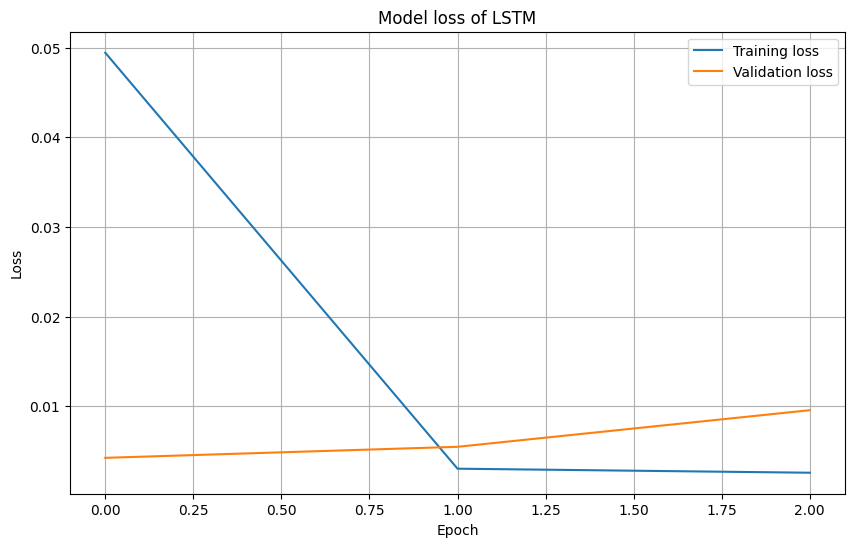

In [ ]:


plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.title('Model loss of LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [29]:
df_2nd = pd.read_csv(data_path +"2nd/" +"train.csv")


df_2nd = df_2nd.drop(['title','author','id'],axis=1)
df_2nd.head()
df_2nd.shape()
df_2nd['clean_text'] = df_2nd['text'].apply(preprocess_text)


tokenizer.fit_on_texts(df_2nd['clean_text'])
sequences = tokenizer.texts_to_sequences(df_2nd['clean_text'])

word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = df_2nd['label'].values

print(data.shape)
print(labels.shape)

TypeError: 'tuple' object is not callable

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = np.squeeze(X_train)
X_test = np.squeeze(X_test)

print(y_test)

loss, accuracy = model2.evaluate(X_test, y_test)
y_pred = model2.predict(X_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


y_pred_binary = np.round(y_pred).flatten()
print('----------------')
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_binary))
print('----------------')
print('Classification report')
print(classification_report(y_test, y_pred_binary))

[1 1 0 ... 1 0 1]
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5276 - loss: 5.7438
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Test Loss: 5.8684844970703125
Test Accuracy: 0.5096153616905212
----------------
Confusion matrix
[[ 188 1944]
 [  96 1932]]
----------------
Classification report
              precision    recall  f1-score   support

           0       0.66      0.09      0.16      2132
           1       0.50      0.95      0.65      2028

    accuracy                           0.51      4160
   macro avg       0.58      0.52      0.41      4160
weighted avg       0.58      0.51      0.40      4160



In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming your test labels are y_test
# Step 1: Make predictions on the test set
y_pred_probs = model2.predict(X_test)

# Step 2: Convert probabilities to class labels
# For binary classification, use a threshold of 0.5
y_pred = (y_pred_probs > 0.5).astype(int)

# If you have one-hot encoded labels, you might need to convert them back to single labels
# Assuming y_test is in one-hot encoded format
# y_test_single = np.argmax(y_test, axis=1)
# y_pred_single = np.argmax(y_pred, axis=1)

# Step 3: Generate the classification report
report = classification_report(y_test, y_pred)
print(report)


130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

           0       0.66      0.09      0.16      2132
           1       0.50      0.95      0.65      2028

    accuracy                           0.51      4160
   macro avg       0.58      0.52      0.41      4160
weighted avg       0.58      0.51      0.40      4160

